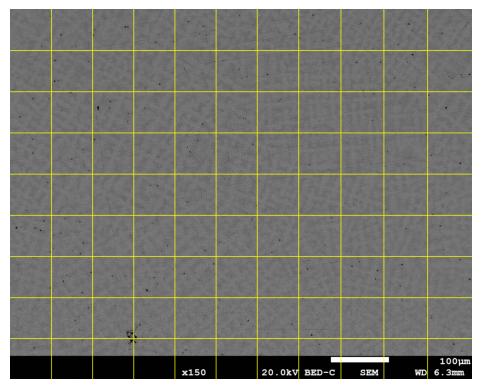

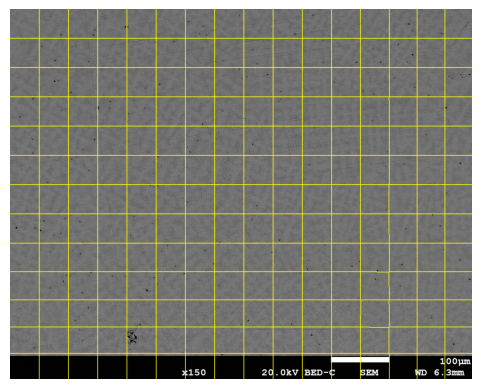

In [19]:
# import the necessary packages
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse
import cv2
import numpy as np

# load the image and convert it to a floating point data type
image = img_as_float(io.imread("/Users/maniksinghsarmaal/Downloads/2.jpg"))
# loop over the number of segments
for numSegments in (100,200):
	# apply SLIC and extract (approximately) the supplied number
	# of segments
	segments = slic(image, n_segments = numSegments, sigma = 5)#channel_axis=No)
	# show the output of SLIC
	fig = plt.figure("Superpixels -- %d segments" % (numSegments))
	ax = fig.add_subplot(1, 1, 1)
	ax.imshow(mark_boundaries(image, segments))
	plt.axis("off")
# show the plots
plt.show()

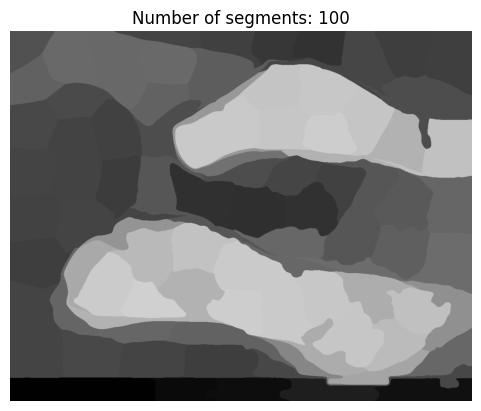

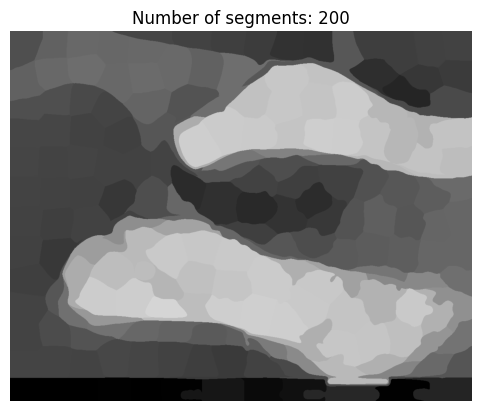

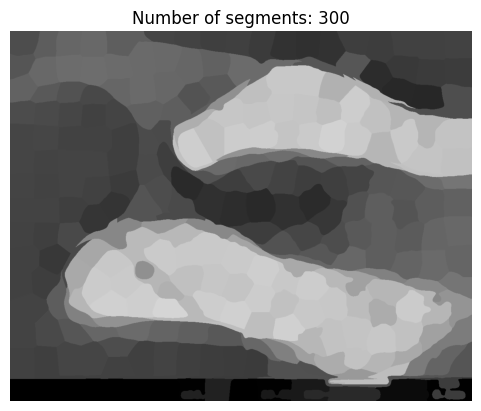

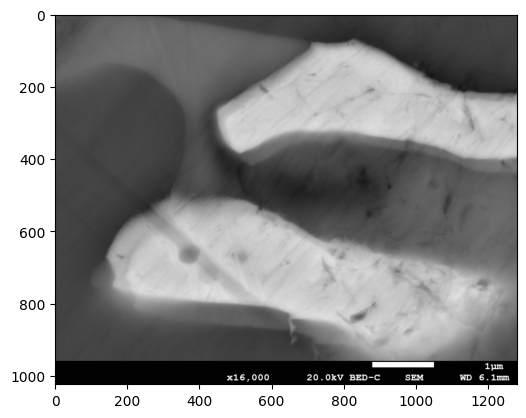

In [17]:
import numpy as np
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
from skimage.measure import regionprops

# Load the image and convert it to a floating point data type
image = img_as_float(io.imread("/Users/maniksinghsarmaal/Downloads/5.jpg"))

for numSegments in (100, 200, 300):
    # Apply SLIC and extract (approximately) the supplied number of segments
    segments = slic(image, n_segments=numSegments, sigma=5)

    # Get the unique segment labels
    unique_labels = np.unique(segments)

    # Create a new image with each segment colored differently
    segmented_image = np.zeros_like(image)
    for label in unique_labels:
        mask = (segments == label)
        segmented_image[mask] = np.mean(image[mask], axis=0)

    # Calculate the area of each segmented region
    regions = regionprops(segments)
    areas = [region.area for region in regions]

    # Show the segmented image
    fig = plt.figure("Segmented Image -- %d segments" % (numSegments))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(segmented_image)
    plt.title(f"Number of segments: {numSegments}")
    #plt.text(10, 10, f"Areas of segments: {areas}", color='white', bbox=dict(facecolor='black', alpha=0.5))
    plt.axis("off")
    plt.show()
    image_path = "/Users/maniksinghsarmaal/Downloads/5.jpg"
    imagex = cv2.imread(image_path)
plt.imshow(imagex)

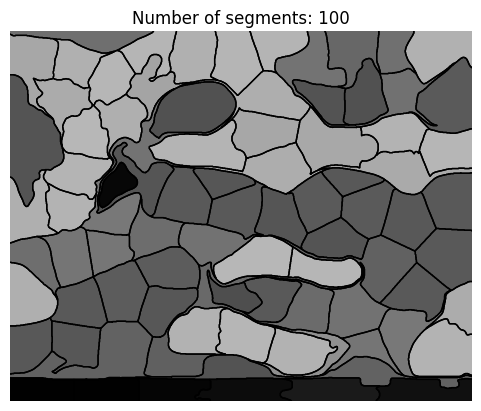

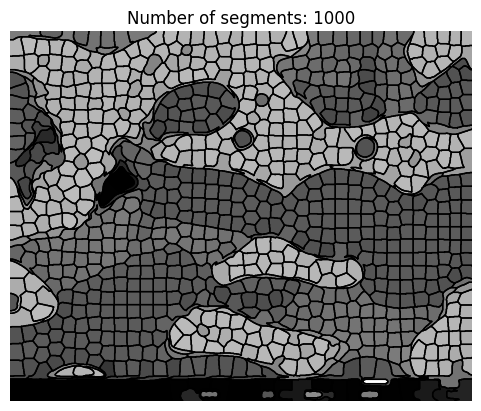

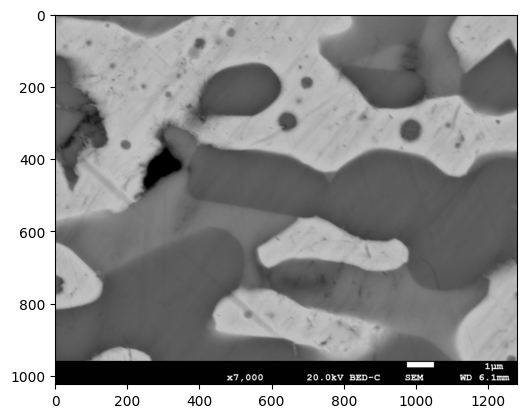

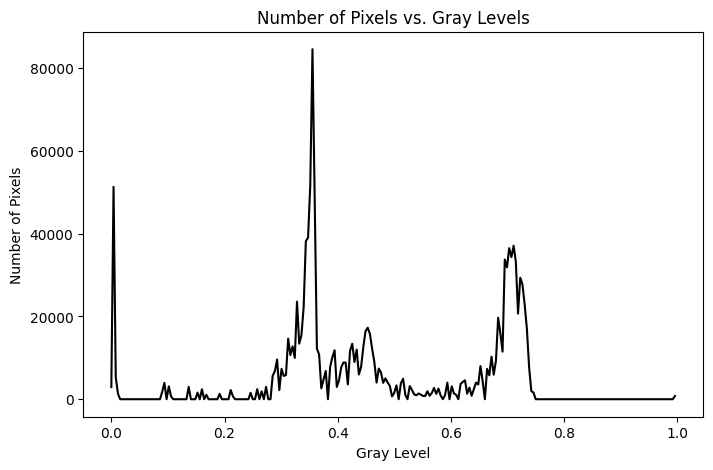

In [12]:
import numpy as np
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io, color
import matplotlib.pyplot as plt
from skimage.measure import regionprops, find_contours

# Load the image and convert it to a floating point data type
image = img_as_float(io.imread("/Users/maniksinghsarmaal/Downloads/3.jpg"))

for numSegments in (100,1000):
    # Apply SLIC and extract (approximately) the supplied number of segments
    segments = slic(image, n_segments=numSegments, sigma=5)

    # Get the unique segment labels
    unique_labels = np.unique(segments)

    # Create a new image with each segment colored differently
    segmented_image = np.zeros_like(image)
    for label in unique_labels:
        mask = (segments == label)
        segmented_image[mask] = np.mean(image[mask], axis=0)

    #gray_segmented_image = color.rgb2gray(segmented_image)

    # Calculate the contours for each segment
    contours = []
    for label in unique_labels:
        mask = (segments == label)
        contour = find_contours(mask, 0.5)
        contours.append(contour)

    # Show the segmented image with contours
    fig = plt.figure("Segmented Image -- %d segments" % (numSegments))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(segmented_image)
    for cnt in contours:
        for c in cnt:
            ax.plot(c[:, 1], c[:, 0], color='black', linewidth=1)
    plt.title(f"Number of segments: {numSegments}")
    plt.axis("off")
    plt.show()
hist, bins = np.histogram(gray_segmented_image.ravel(), bins=256, range=(0, 1))
plt.imshow(cv2.imread('/Users/maniksinghsarmaal/Downloads/3.jpg'))
# Plot the number of pixels (voxels) versus gray levels

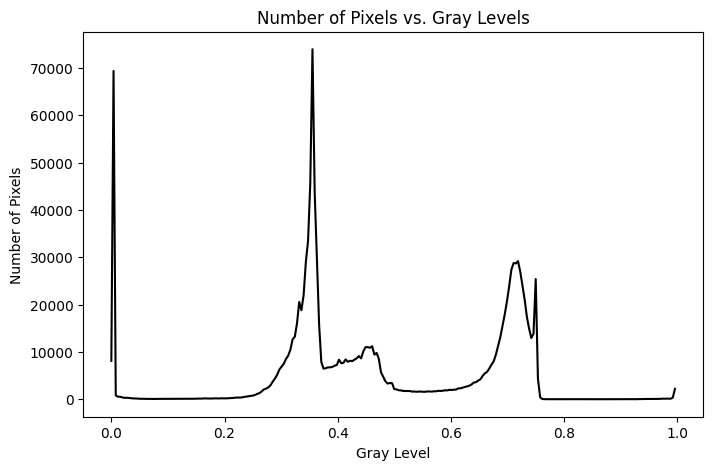

In [13]:
gray_image = color.rgb2gray(image)

# Calculate the histogram of pixel intensities
hist, bins = np.histogram(gray_image.ravel(), bins=256, range=(0,1))

# Plot the number of pixels (voxels) versus gray levels
plt.figure(figsize=(8, 5))
plt.plot(bins[:-1], hist, color='black')
plt.title('Number of Pixels vs. Gray Levels')
plt.xlabel('Gray Level')
plt.ylabel('Number of Pixels')
plt.show()

In [39]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt


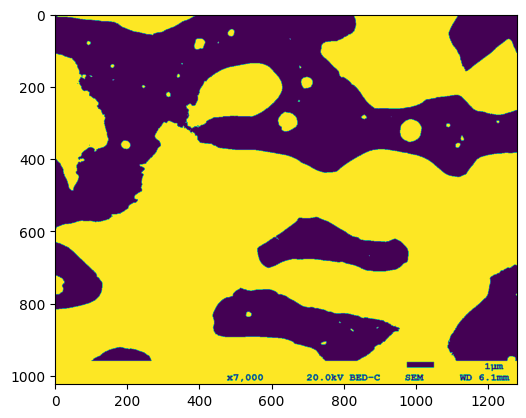

In [41]:
img = cv.imread('/Users/maniksinghsarmaal/Downloads/3.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(img)
plt.imshow(thresh)